I will be performing a survival analysis of the amount of days on Ibruntinib, where the event of interest is either:
- death 
- Major or minor bleeding 
- Major bleeding 
- (everything else is censored). 

I'll first be applying Kapler Meier curves. Note, for these, any stratification factor that is applied must be categorical.

Import necessary libraries 

In [1]:
#install.packages(c("survival", "survminer"))

library("survival")
library("survminer")

print("complete")

Loading required package: ggplot2
Loading required package: ggpubr


[1] "complete"


Import the data

In [2]:
# Import the data and look at the first six rows
bleed_data <- read.csv(file = '/Users/anthonyquint/Desktop/LHSC_Work_Folder/Mina/Bleeding_study/Ibrutinib Data Set, July 13,2021, de- identified data_cleaned_forSurvAnal.csv')
## bleed_data_cyto is the dataset with the rows that have 'unknown' cytogenetics removed. Only use this data set 
## when plotting survival curves where cytogenetics are the stratification factor 
bleed_data_cyto <- read.csv(file = '/Users/anthonyquint/Desktop/LHSC_Work_Folder/Mina/Bleeding_study/Ibrutinib Data Set, July 13,2021, de- identified data_cleaned_forSurvAnal_CtyoCleaned.csv')
#head(bleed_data)


Fit a kapler meier curve. I can adjust the event of interest and stratification factor as needed. In this case, we are looking at when major bleeding is the event of interest, and the stratification factor is Anemia (hb <100 (Y/N)). 

In [3]:
fit <- survfit(Surv(Bleed.2_Time_on_Ibruntinib,Bleed.2_MajOnly.1...censored..2...event.) ~ Anemia..hb...100...Y.N., data = bleed_data)
print(fit)
summary(fit)
summary(fit)$table

Call: survfit(formula = Surv(Bleed.2_Time_on_Ibruntinib, Bleed.2_MajOnly.1...censored..2...event.) ~ 
    Anemia..hb...100...Y.N., data = bleed_data)

   1 observation deleted due to missingness 
                           n events median 0.95LCL 0.95UCL
Anemia..hb...100...Y.N.=0 90      4     NA      NA      NA
Anemia..hb...100...Y.N.=1 78     12     NA      NA      NA


Call: survfit(formula = Surv(Bleed.2_Time_on_Ibruntinib, Bleed.2_MajOnly.1...censored..2...event.) ~ 
    Anemia..hb...100...Y.N., data = bleed_data)

1 observation deleted due to missingness 
                Anemia..hb...100...Y.N.=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  161     79       1    0.987  0.0126        0.963            1
  313     64       1    0.972  0.0197        0.934            1
  335     62       1    0.956  0.0248        0.909            1
  487     49       1    0.937  0.0311        0.878            1

                Anemia..hb...100...Y.N.=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0     78       1    0.987  0.0127        0.963        1.000
    6     76       1    0.974  0.0180        0.940        1.000
    8     75       1    0.961  0.0220        0.919        1.000
   14     74       1    0.948  0.0252        0.900        0.999
   15     73       2    0.922  0.0305        0.864        0.984
   35     69    

,records,n.max,n.start,events,*rmean,*se(rmean),median,0.95LCL,0.95UCL
Anemia..hb...100...Y.N.=0,90,90,90,4,2274.442,63.64353,NA,NA,NA
Anemia..hb...100...Y.N.=1,78,78,78,12,2018.691,102.73858,NA,NA,NA


Plot kapler meier curve

Warning message in .add_surv_median(p, fit, type = surv.median.line, fun = fun, :
“Median survival not reached.”

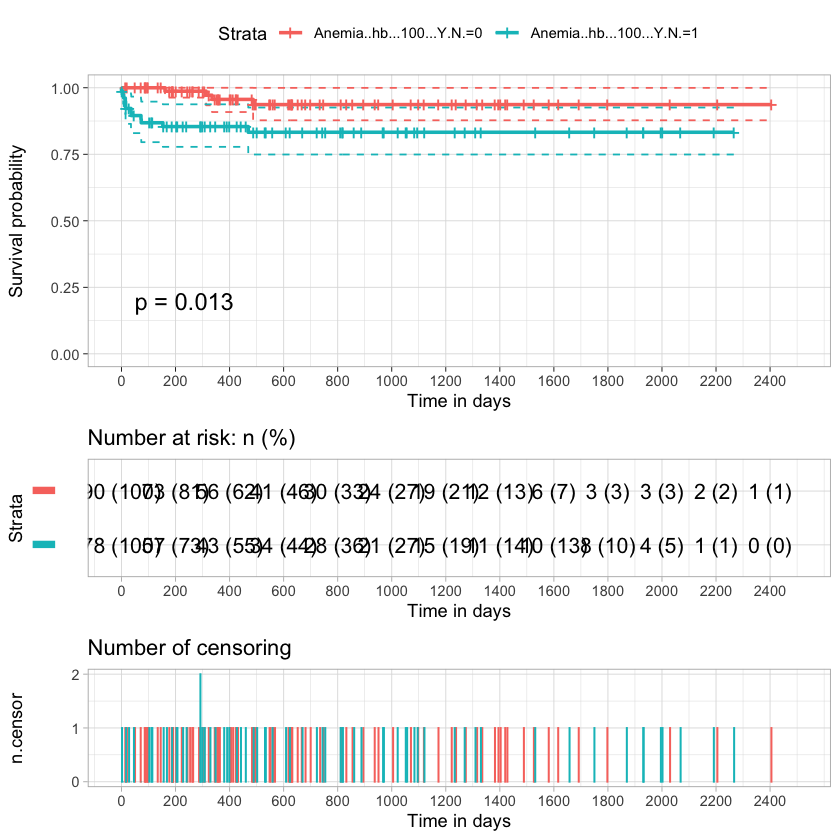

In [4]:
ggsurvplot(
   fit,                     # survfit object with calculated statistics.
   pval = TRUE,             # show p-value of log-rank test.
   conf.int = TRUE,         # show confidence intervals for 
                            # point estimaes of survival curves.
   conf.int.style = "step",  # customize style of confidence intervals
   xlab = "Time in days",   # customize X axis label.
   break.time.by = 200,     # break X axis in time intervals by 200.
   ggtheme = theme_light(), # customize plot and risk table with a theme.
   risk.table = "abs_pct",  # absolute number and percentage at risk.
  risk.table.y.text.col = T,# colour risk table text annotations.
  risk.table.y.text = FALSE,# show bars instead of names in text annotations
                            # in legend of risk table.
  ncensor.plot = TRUE,      # plot the number of censored subjects at time t
  surv.median.line = "hv",  # add the median survival pointer.
  #legend.labs = 
   # c("Female", "Male"),    # change legend labels.
  #palette = 
   # c("#E7B800", "#2E9FDF") # custom color palettes.
)

Log-Rank test to establish signficance 

In [5]:
#surv_diff <- survdiff(Surv(duration.of.ibrutinib..in.days.,Death..only.by.last.FU.) ~ Major.Bleed..Y.N., data = bleed_data)
#surv_diff